# Pré-processamento
Este notebook é responsável por pré-processar os dados realizando as seguintes tarefas:
- Tratamento de dados ausentes
- Definição de tipos
- Normalização e discretização
- Limpeza de dados (univariado, bivariado e multivariado)

Este notebook usa o 'clean_vehicles.csv' como dataset, que já não tem mais as colunas 'county', 'region_url' e 'image_url'.

In [1]:
from Utils import *
from tqdm import tqdm

df = pd.read_csv(CLEAN_VEHICLES_DATASET)

## Definição de tipos
Olhando para a tabela que descreve o dataset em '1-initial-analysis.ipynb' e pela análise feita no notebook, os dados foram definidos nos formatos abaixo.

### Colunas categóricos
- type
- region
- transmission
- manufacturer
- model
- condition
- cylinders
- fuel
- title_status
- drive
- size (removido)
- paint_color
- state

### Colunas do tipo inteiro
- id (removida)
- price
- year
- odometer

### Coluna do tipo float
- lat
- long

### Colunas do tipo object
- url
- description
- vin (removida)

## Tratamento de dados ausentes ou nulos
Antes de podermos definir os tipos dos dados vamos primeiro lidar com os dados nulos ou ausentes.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            435849 non-null  int64  
 1   url           435849 non-null  object 
 2   region        435849 non-null  object 
 3   price         435849 non-null  int64  
 4   year          434732 non-null  float64
 5   manufacturer  415102 non-null  object 
 6   model         429650 non-null  object 
 7   condition     249043 non-null  object 
 8   cylinders     269465 non-null  object 
 9   fuel          432858 non-null  object 
 10  odometer      360701 non-null  float64
 11  title_status  434043 non-null  object 
 12  transmission  433703 non-null  object 
 13  vin           239197 non-null  object 
 14  drive         313838 non-null  object 
 15  size          139888 non-null  object 
 16  type          318741 non-null  object 
 17  paint_color   300602 non-null  object 
 18  desc

In [3]:
# Verifica quais dados são nulos.
df.isnull().sum()

id                   0
url                  0
region               0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
description         27
state                0
lat               8235
long              8235
dtype: int64

Foi notado que as colunas 'vin' (código único do veículo, não será útil) e 'size' ('type' já fornece a mesma informação) apresentam muitos dados nulos, mais de 50% do tamanho do dataset. Elas serão removidas. A coluna 'id' também será removida pois não será útil, é apenas um identificador da oferta no craig list.

In [3]:
df.drop(columns=['vin', 'size', 'id'], inplace=True)
df.columns

Index(['url', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'description', 'state', 'lat', 'long'],
      dtype='object')

### Removendo linhas com muitos valores vazios
Deixa no DataFrame apenas amostras que contém valores não-nulos em pelo 14 colunas (75% do número total de colunas) das 19 colunas. Reduzindo em 9% o tamanho da base.

In [4]:
drop_thresh = int(len(df.columns) * 0.75)
original_size = len(df)
df.dropna(thresh=drop_thresh, inplace=True)
print("Redução de %.2f%% no tamanho da base." % ((1 - (len(df)/original_size)) * 100))

Redução de 8.94% no tamanho da base.


### Tratamento de dados ausentes em Dados do tipo inteiro
Para os dados do tipo inteiro foi verificado que existe dados nulos apenas nas coluna 'year' e 'odometer'. 

#### Coluna 'year'
Poucas amostras possui valor nulo na coluna 'year', representando 0,2% do dataset. Como o ano é um fator importante para a compra e venda de carros, queremos manter essas amostras.

Foi feita uma análise e notou-se que nesses casos o ano é na maioria das vezes os 4 primeiros dígitos da descrição seguidos da marca e modelo do carro. Usamos a função 'get_year_from_description' para realizar esse processo, a definição da função está no Utils.py.

In [5]:
df['year'].isnull().sum()

1070

In [6]:
# mostra os 20 primeiros caracteres da descrição das linhas que possuem a coluna ano nula
for elem in df[df['year'].isnull().values]['description']:
    try:
        print(elem[0:40])
    except:
        print(elem)

2019 *Chrysler* *Pacifica* Touring Plus 
2019 *Jeep* *Grand Cherokee* Laredo SUV 
2018 *Toyota* *Tacoma* TACOMA SR5 V6 DOU
2019 *Ford* *Super Duty F-350 DRW Cab-Ch
2018 *Subaru* *Forester* 2.5i CVT SUV - 
2018 *Volkswagen* *Jetta* 1.4T S Automat
2018 *Cadillac* *CTS-V Sedan* 4dr Sedan 
2019 *Ford* *F-150* Lariat 4x4 4dr Super
2018 *Honda* *Accord Sedan* Sport 2.0T 1
2019 *Kia* *Optima* LX Automatic Sedan -
2020 *Chevrolet* *5500XD LCF Diesel* 550
2019 *Ford* *Super Duty F-350 DRW Cab-Ch
2019 *Chevrolet* *Corvette* 2dr Grand Sp
2018 *Chevrolet* *Tahoe* LT-4X4-22S-NEW 
2018 *Honda* *Pilot* EX-L 2WD SUV - $28,
2018 *Acura* *TLX*  Sedan - $29,975Call 
2019 *Chevrolet* *Silverado 1500 LD* LT 
2019 *Mitsubishi* *Mirage* ES CVT ONLY 3
2019 *Ford* *Super Duty F-350 DRW Cab-Ch
2018 *Subaru* *Legacy* 2.5i Premium Seda
2018 *Hyundai* *Accent* SE Sedan Automat
2018 *Toyota* *Tacoma* TACOMA SR5 V6 DOU
2019 *Ford* *Super Duty F-350 DRW Cab-Ch
2019 *BMW* *X7* xDrive50i Sports Activit
2019 *Ford* *Esc

In [7]:
get_year_from_description(df)

In [8]:
df.dropna(subset=['description'], inplace=True)
df.isnull().sum()

url                  0
region               0
price                0
year                 3
manufacturer     14882
model             3641
condition       148571
cylinders       127597
fuel              2494
odometer         38208
title_status      1410
transmission      1789
drive            83169
type             78665
paint_color      96709
description          0
state                0
lat               7552
long              7552
dtype: int64

In [9]:
df[df['year'].isnull()]

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
15321,https://chattanooga.craigslist.org/cto/d/ten-m...,chattanooga,2700,NaN,NaN,ep liberty,excellent,6 cylinders,gas,208000.0,rebuilt,automatic,rwd,SUV,grey,03 jeep liberty 2 wheel drive v6 runs good col...,tn,35.6279,-84.7542
170030,https://sandiego.craigslist.org/nsd/cto/d/esco...,san diego,5000,NaN,NaN,yota 4x4,excellent,6 cylinders,gas,NaN,clean,automatic,4wd,pickup,white,"92 toyota 4x4 king cab automatic, v6, JBL blu...",ca,33.1039,-117.0770
333060,https://lakeland.craigslist.org/cto/d/babson-p...,lakeland,3800,NaN,NaN,oor,good,8 cylinders,gas,200000.0,clean,automatic,4wd,truck,white,Nice truck 4wD. Everything works new brakes 80...,fl,27.7618,-81.5749


#### Sobram três linhas em que o ano é nulo:

In [10]:
for elem in df[df['year'].isnull()]['description']:
    print(elem)
    print('\n')

03 jeep liberty 2 wheel drive v6 runs good cold air and hot heat all windows work real nice on the inside and out it does have a reconstructed title 423twofivetwosevenzeroninesix


92 toyota 4x4 king cab automatic, v6, JBL  blue tooth stereo, clean title, 3rd owner, no accident, runs great


Nice truck 4wD. Everything works new brakes 80 percent tires 4.6 v8




Pela descrição so consegue-se informação do ano para linha com indice 170030 e 15321, o toyota de ano 1992 e o jeep de 2003, respectivamente.

In [11]:
df.at[170030, 'year'] = 1992
df.at[15321, 'year'] = 2003

As outra linha vamos descartar

In [12]:
df.dropna(subset=['year'], inplace=True)
df.isnull().sum()

url                  0
region               0
price                0
year                 0
manufacturer     14881
model             3641
condition       148571
cylinders       127597
fuel              2494
odometer         38208
title_status      1410
transmission      1789
drive            83169
type             78665
paint_color      96709
description          0
state                0
lat               7552
long              7552
dtype: int64

O ano foi inferido como float64 pelo pandas, verificamos se há ou não casas decimais no com a função 'get_decimal' definida no script Utils.py para cada linha do dataframe:

In [13]:
df['year'].dtype

dtype('float64')

Como a serie retornada é vazia, todos os anos são números inteiros.

In [14]:
teste = df['year'].apply(get_decimal)
teste = teste[teste > 0]
teste

Series([], Name: year, dtype: float64)

#### Coluna 'odometer'
Vamos tentar pegar informações sobre o odômetro na descrição da oferta. 

In [15]:
# quantidade de nulos na coluna odometer
df['odometer'].isnull().sum()

38208

miles_df contém todas entradas com coluna odometer nula e que a descrição contém a alguma informação sobre as milhas do carro

In [16]:
miles_df = df[df['odometer'].isnull() & df['description'].str.contains('[Mm][Ii][Ll][Ee][Ss]*|[Mm][Ii][Ll][Ee][Aa][Gg][Ee]')]
miles_df

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,3495,2012.0,jeep,patriot,like new,4 cylinders,gas,NaN,clean,automatic,NaN,NaN,silver,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",az,34.4554,-114.2690
14,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,4995,2009.0,jeep,liberty,like new,6 cylinders,gas,NaN,clean,automatic,NaN,NaN,black,CHECK OUT THIS SUPER CLEAN 2009 JEEP LIBERTY! ...,az,34.5575,-114.3310
22,https://maine.craigslist.org/cto/d/waterville-...,maine,2200,1999.0,gmc,NaN,good,8 cylinders,gas,NaN,clean,automatic,4wd,SUV,black,STICKERED TILL NOVEMBER!!! Runs and drives!!! ...,me,44.5543,-69.6178
84,https://miami.craigslist.org/brw/ctd/d/miami-2...,south florida,17995,2019.0,mini,cooper convertible s,like new,NaN,gas,NaN,clean,automatic,NaN,convertible,grey,"2019 MINI COOPER CONVERTIBLE SPORT, LIKE NEW, ...",fl,25.9630,-80.1702
91,https://miami.craigslist.org/brw/ctd/d/miami-2...,south florida,4995,2009.0,jeep,grand cherokee,like new,NaN,gas,NaN,clean,automatic,NaN,SUV,grey,2009 Jeep Grand Cherokee with only a 111.400 M...,fl,25.9629,-80.1699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435768,https://maine.craigslist.org/cto/d/gorham-2004...,maine,3000,2004.0,subaru,forester,fair,4 cylinders,gas,NaN,clean,manual,NaN,SUV,NaN,motor 60-70k miles just recently have put in. ...,me,43.6843,-70.4680
435791,https://oregoncoast.craigslist.org/ctd/d/eugen...,oregon coast,8990,2009.0,jeep,liberty,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,We are open to serve our community! With the...,or,44.0451,-123.0440
435799,https://oregoncoast.craigslist.org/ctd/d/eugen...,oregon coast,10990,2014.0,ford,focus titanium,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,We are open to serve our community! With the...,or,44.0451,-123.0440
435804,https://mohave.craigslist.org/cto/d/bullhead-c...,mohave county,6400,2010.0,mini,cooper s,like new,4 cylinders,gas,NaN,clean,automatic,fwd,coupe,white,2010 MINI COOPER S HARDTOP WITH PANORAMIC SUNR...,az,35.0861,-114.6120


In [17]:
# tenta obter informação sobre as milhas de um carro na descrição do anúncio
get_odometer_from_description(df)

Não foi possível encontrar as milhas do carro na descrição em 37 amostras.


In [18]:
df.isnull().sum()

url                  0
region               0
price                0
year                 0
manufacturer     14881
model             3641
condition       148571
cylinders       127597
fuel              2494
odometer         22896
title_status      1410
transmission      1789
drive            83169
type             78665
paint_color      96709
description          0
state                0
lat               7552
long              7552
dtype: int64

In [19]:
# verifica se há amostras do odometro que possam conter casas decimais
teste = df[df['odometer'].notnull()]['odometer'].apply(get_decimal)
teste = teste[teste > 0]
teste

Series([], Name: odometer, dtype: float64)

Para as linhas restantes que ainda possuem o valor 'odometer' nulo, atribuimos o valor de -1.

In [20]:
df['odometer'].fillna(-1, inplace=True)

In [21]:
df['odometer'].isnull().sum()

0

### Tratamento de dados ausentes em Dados categóricos
Para os dados categóricos iremos criar uma nova categoria 'undefined' para substituir os dados ausentes.

In [22]:
categoric_types = ['type', 'region', 'transmission', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'drive', 'paint_color', 'state']

for column in categoric_types:
    df[column] = df[column].fillna('undefined')

In [23]:
# confirmando que não há mais amostras com dados categoricos nulos no novo dataframe
df.isnull().sum()

url                0
region             0
price              0
year               0
manufacturer       0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
title_status       0
transmission       0
drive              0
type               0
paint_color        0
description        0
state              0
lat             7552
long            7552
dtype: int64

### Tratamento de dados ausentes em Dados do tipo object
Como retiramos a coluna 'vin' do dataset, não há mais colunas de tipo object com valores nulos.

In [24]:
df[['url', 'description']].isnull().sum()

url            0
description    0
dtype: int64

### Tratamento de dados ausentes em Dados do tipo Float
Os únicos dados floats nulos no dataset são as coordenadas (latitude e longitude).
#### Latitude e Longitude
Para as colunas de latitude e longitude, decidimos pegar as coordenadas dos estados nas linhas que possuiam latitude ou longitude nulas. Foi usado o módulo 'Nominatin' da biblioteca 'geopy', esse módulo permite obter informações como endereço, latitude, longitude e outros dados de localização a partir de uma string passada contendo o nome do local a ser consultado.

Para nosso projeto listamos todos os 51 estados dos EUA, eles estão definidos em formato de dicionário no arquivo 'Constants.py' na variável STATES_DICT. Usando esse dicionário fizemos chamadas ao módulo 'Nominatin' para obter as coordenadas centrais de cada um dos estados dos Estados Unidos. Finalmente, substituímos os dados nulos de coordenadas no dataframe por esses retornados pelo módulo 'Nominatin'. A função responsável é 'put_coordinates_in_dataframe' e está no 'Utils.py'.

In [3]:
df[['lat', 'long']].isnull().sum()

lat     7552
long    7552
dtype: int64

In [4]:
null_coords_df = df[df['lat'].isnull() & df['long'].isnull()]
null_coords_df

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
278,https://greenville.craigslist.org/ctd/d/bmw-6-...,greenville / upstate,0,2013.0,bmw,640 gran coupe,undefined,6 cylinders,gas,62140.0,clean,automatic,rwd,sedan,grey,BMW 6 Series 640 Gran Coupe Sunroof Leather Po...,sc,NaN,NaN
327,https://bham.craigslist.org/ctd/d/lexus-lx-570...,birmingham,0,2011.0,lexus,lx 570,undefined,8 cylinders,gas,110785.0,clean,automatic,4wd,SUV,silver,Lexus LX 570 Mark Levinson Audio Rear DVD Wide...,al,NaN,NaN
351,https://richmond.craigslist.org/ctd/d/2008-bmw...,richmond,6200,2008.0,bmw,3-series,excellent,6 cylinders,gas,124511.0,clean,automatic,rwd,sedan,silver,2008 *** BMW 3-Series 4dr Sdn 328i RWD Sedan *...,va,NaN,NaN
473,https://bham.craigslist.org/ctd/d/volkswagen-t...,birmingham,0,2015.0,volkswagen,touareg,undefined,6 cylinders,gas,52494.0,clean,automatic,4wd,SUV,grey,Volkswagen Touareg V6 Lux 4Motion Navigation B...,al,NaN,NaN
508,https://bham.craigslist.org/ctd/d/cadillac-elr...,birmingham,0,2014.0,cadillac,elr,undefined,undefined,electric,49333.0,clean,automatic,fwd,coupe,silver,Cadillac ELR Luxury Package Blind Spot Cross T...,al,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396153,https://richmond.craigslist.org/ctd/d/2010-che...,richmond,5700,2010.0,chevrolet,impala,excellent,6 cylinders,gas,102026.0,clean,automatic,fwd,sedan,silver,2010 *** Chevrolet Impala 4dr Sdn LT Sedan ***...,va,NaN,NaN
396294,https://greenville.craigslist.org/ctd/d/acura-...,greenville / upstate,0,2017.0,acura,rdx,undefined,6 cylinders,gas,87014.0,clean,automatic,4wd,SUV,white,Acura RDX Advance Package SH-AWD Navigation Ba...,sc,NaN,NaN
396620,https://greenville.craigslist.org/ctd/d/cadill...,greenville / upstate,0,2016.0,cadillac,escalade,undefined,8 cylinders,gas,87899.0,clean,automatic,4wd,SUV,black,Cadillac Escalade Premium Navigation Backup Ca...,sc,NaN,NaN
396824,https://richmond.craigslist.org/ctd/d/2004-cad...,richmond,5800,2004.0,cadillac,escalade,excellent,8 cylinders,gas,169295.0,clean,automatic,4wd,undefined,white,2004 *** Cadillac Escalade 4dr AWD *** Dri...,va,NaN,NaN


In [6]:
put_coordinates_in_dataframe(df)

In [57]:
df.isnull().sum()

url             0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
dtype: int64

## Definindo os tipos dos dados no dataframe
Com todos os dados nulos devidamente tratados podemos setar os tipos dos dados no dataframe.

In [8]:
set_df_vehicles_data_types(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396901 entries, 0 to 396900
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   url           396901 non-null  object  
 1   region        396901 non-null  category
 2   price         396901 non-null  int64   
 3   year          396901 non-null  int64   
 4   manufacturer  396901 non-null  category
 5   model         396901 non-null  category
 6   condition     396901 non-null  category
 7   cylinders     396901 non-null  category
 8   fuel          396901 non-null  category
 9   odometer      396901 non-null  int64   
 10  title_status  396901 non-null  category
 11  transmission  396901 non-null  category
 12  drive         396901 non-null  category
 13  type          396901 non-null  category
 14  paint_color   396901 non-null  category
 15  description   396901 non-null  object  
 16  state         396901 non-null  category
 17  lat           396901 non-null

## Limpeza de dados

In [6]:
# Nenhum registro duplicado encontrado
df[df.duplicated()]

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long


### Limpando coluna 'manufacturer'
A coluna 'manufacturer' possui cerca de 15mil registros listados como 'undefined', que é equivalente a nulo. Criamos um método, 'get_brand_from_description', para tentar pegar informações na descrição do registro e então substituir o valor de manufacturer.

In [8]:
df['manufacturer'].value_counts()

ford               71017
chevrolet          56490
toyota             31843
nissan             21555
honda              20616
ram                18833
jeep               18552
gmc                17163
undefined          14881
dodge              12987
bmw                11833
hyundai             9886
subaru              9831
volkswagen          9189
mercedes-benz       9018
kia                 7311
chrysler            5962
cadillac            5794
lexus               5252
buick               5079
mazda               4915
audi                4732
acura               3227
infiniti            3122
lincoln             2591
volvo               2453
pontiac             2375
mitsubishi          2249
mini                1799
rover               1723
mercury             1086
saturn              1065
fiat                 876
jaguar               868
tesla                317
harley-davidson      127
ferrari               75
alfa-romeo            65
datsun                61
aston-martin          34


In [11]:
get_brand_from_description(df)

In [12]:
# após execução do método, conseguimos recuperar informação sobre a marca de cerca de 4mil registros.
df['manufacturer'].value_counts()

ford               71639
chevrolet          56765
toyota             32107
nissan             21705
honda              20616
ram                19120
jeep               18635
gmc                17270
dodge              13130
undefined          11958
bmw                11905
hyundai             9984
subaru              9907
volkswagen          9258
mercedes-benz       9104
kia                 7350
chrysler            6026
cadillac            5848
lexus               5289
buick               5101
mazda               4971
audi                4732
acura               3238
infiniti            3147
lincoln             2628
volvo               2481
pontiac             2389
mitsubishi          2276
mini                1853
rover               1723
mercury             1096
saturn              1067
jaguar               878
fiat                 877
tesla                322
harley-davidson      127
ferrari               83
morgan                79
alfa-romeo            65
datsun                61


### Limpando coluna 'odometer' (univariado)
Para limpar os outliers da coluna 'odometer' foi utilizado o o método z-score.

<AxesSubplot:>

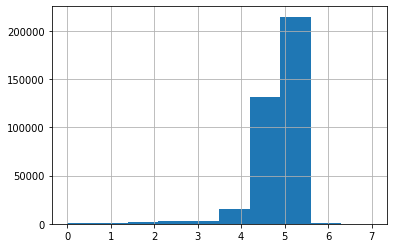

In [9]:
# Usando o log para melhor visualizar os dados
df['log_odometer'] = df['odometer'].apply(np.log10)
df[df['log_odometer'] >= 0]['log_odometer'].hist()

<AxesSubplot:>

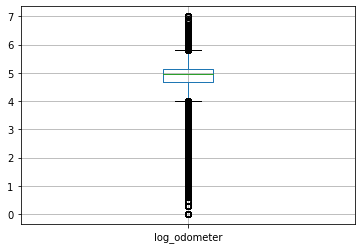

In [10]:
df[df['log_odometer'] >= 0].boxplot(column=['log_odometer'])

In [11]:
# Dataframe dos registros que possuem um z-score menor que 3.5 para a coluna 'log_odometer'
z_score_df = evaluate_df_z_score_for_column(df, 'log_odometer')

In [12]:
# É necessário colocar de volta os registros de carros com zero milhas, esses não são outliers
zero_miles_cars_df = df[df['odometer'] == 0]
z_score_df = z_score_df.append(zero_miles_cars_df)

<AxesSubplot:>

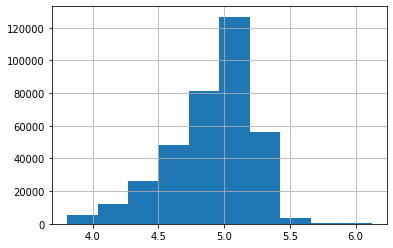

In [13]:
z_score_df[z_score_df['log_odometer'] >= 0]['log_odometer'].hist()

<AxesSubplot:>

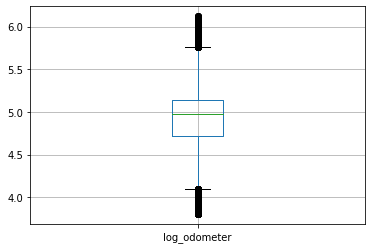

In [14]:
z_score_df[z_score_df['log_odometer'] >= 0].boxplot(column=['log_odometer'])

In [15]:
# Redução de 9% no tamanho da base de dados após remover os outliers
len(z_score_df)/len(df)

0.9119201009823609

In [16]:
# Remove a coluna de 'log_odometer' criada para a análise
z_score_df.drop(columns=['log_odometer'], inplace=True)

In [17]:
# Atribuindo o dataframe limpo ao nosso dataframe inicial
df = z_score_df
df

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,3495,2012,jeep,patriot,like new,4 cylinders,gas,132000,clean,automatic,undefined,undefined,silver,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",az,34.4554,-114.2690
1,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,13750,2014,bmw,328i m-sport,good,undefined,gas,76237,clean,automatic,rwd,sedan,grey,Selling my 2014 BMW 328i with the following be...,or,46.1837,-123.8240
2,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,2300,2001,dodge,caravan,excellent,6 cylinders,gas,199000,clean,automatic,undefined,undefined,undefined,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",sc,34.9352,-81.9654
3,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,9000,2004,chevrolet,colorado ls,excellent,5 cylinders,gas,54000,clean,automatic,rwd,pickup,red,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",az,34.4783,-114.2710
5,https://maine.craigslist.org/cto/d/gardiner-20...,maine,8500,2005,ford,mustang convertible,excellent,6 cylinders,gas,62800,clean,automatic,rwd,convertible,silver,2005 Ford Mustang Premium Convertible First ye...,me,44.2070,-69.7858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396238,https://flagstaff.craigslist.org/ctd/d/flagsta...,flagstaff / sedona,28734,2020,chevrolet,equinox lt,good,undefined,gas,0,clean,automatic,undefined,other,blue,Why Buy From Terry Marxen Chevrolet Cadillac?W...,az,35.1900,-111.6660
396293,https://greenville.craigslist.org/ctd/d/myrtle...,greenville / upstate,8995,2005,gmc,sierra 2500hd,good,8 cylinders,gas,0,clean,automatic,4wd,truck,white,"Affordable Automobiles, South Carolina's Comme...",sc,33.7115,-78.9096
396307,https://flagstaff.craigslist.org/ctd/d/flagsta...,flagstaff / sedona,22284,2020,chevrolet,trax lt,good,undefined,gas,0,clean,automatic,undefined,other,white,Why Buy From Terry Marxen Chevrolet Cadillac?W...,az,35.1900,-111.6660
396562,https://maine.craigslist.org/ctd/d/salem-nh-ma...,maine,0,2012,honda,pilot,excellent,undefined,gas,0,clean,automatic,undefined,SUV,undefined,2012 *** Honda Pilot SUV *** Ready To Upgra...,me,42.7663,-71.2352


### Limpando coluna 'price' (univariado)
Semelhante à coluna 'odometer', aplicou-se o z-score para tratar os dados da coluna 'odometer'.

<AxesSubplot:>

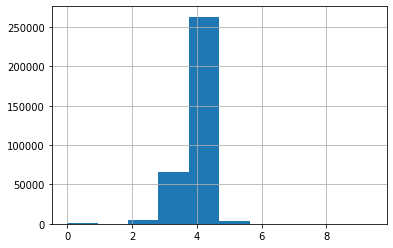

In [18]:
df['log_price'] = df['price'].apply(np.log10)
df[df['log_price'] >= 0]['log_price'].hist()

<AxesSubplot:>

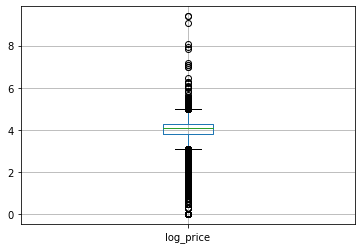

In [19]:
df[df['log_price'] >= 0].boxplot(column=['log_price'])

In [20]:
# Dataframe dos registros que possuem um z-score menor que 3.5 para a coluna 'log_price'
z_score_df_price = evaluate_df_z_score_for_column(df, 'log_price')

In [21]:
# Não faz sentido ter carros com preço igual a zero, logo serão removidos.
df[df['price'] == 0]

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,log_price
6,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,0,2012,ram,3500,undefined,6 cylinders,diesel,116515,clean,automatic,4wd,truck,undefined,"Sunrise Auto SalesTry our Delivery Service , N...",or,45.4072,-122.6250,-inf
15,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,0,2017,gmc,sierra 3500,undefined,8 cylinders,diesel,53193,clean,automatic,4wd,truck,undefined,"Sunrise Auto SalesTry our Delivery Service , N...",or,45.4072,-122.6250,-inf
28,https://oregoncoast.craigslist.org/ctd/d/sprin...,oregon coast,0,2008,dodge,grand caravan se,good,6 cylinders,gas,144497,clean,automatic,fwd,mini-van,blue,COVID-19 STANDARD OPERATING PROCEDURES FOR HYL...,or,44.0442,-123.0030,-inf
31,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,0,2004,chevrolet,silverado 2500,undefined,8 cylinders,diesel,209752,clean,automatic,4wd,truck,undefined,"Sunrise Auto SalesTry our Delivery Service , N...",or,45.4072,-122.6250,-inf
38,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,0,2015,ford,f-350 super duty xlt,undefined,8 cylinders,diesel,73168,clean,automatic,4wd,truck,undefined,"Sunrise Auto SalesTry our Delivery Service , N...",or,45.4072,-122.6250,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394493,https://myrtlebeach.craigslist.org/ctd/d/myrtl...,myrtle beach,0,2016,chevrolet,express,good,8 cylinders,gas,0,clean,automatic,rwd,van,white,2016 Chevrolet Express 2500 Cargo Extended - C...,sc,33.7115,-78.9096,-inf
394508,https://shreveport.craigslist.org/ctd/d/flatbe...,shreveport,0,2014,ford,f550 4x4,undefined,undefined,diesel,0,clean,other,undefined,other,white,"All Trucks USA12106 Old River RdRockton, IL 61...",la,30.8704,-92.0070,-inf
395282,https://greenville.craigslist.org/ctd/d/myrtle...,greenville / upstate,0,2015,ford,transit,good,6 cylinders,gas,0,clean,automatic,rwd,van,white,"Affordable Automobiles, South Carolina's Comme...",sc,33.7115,-78.9096,-inf
395462,https://csd.craigslist.org/ctd/d/enclosed-serv...,pierre / central SD,0,2012,ford,f350 4x4,undefined,undefined,diesel,0,clean,other,undefined,other,white,All Trucks USAAsk for: Craigslist Sales☎ (815)...,sd,44.6472,-100.3490,-inf


In [22]:
# Não há mais amostras com preço igual a zero no novo dataframe.
z_score_df_price[z_score_df_price['price'] == 0]

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,log_price


<AxesSubplot:>

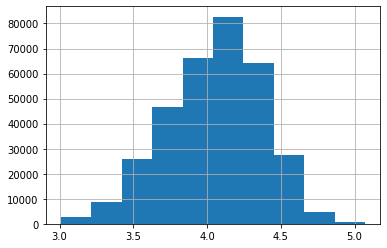

In [23]:
z_score_df_price['log_price'].hist()

<AxesSubplot:>

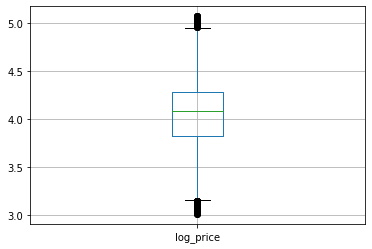

In [24]:
z_score_df_price.boxplot(column=['log_price'])

In [25]:
# Redução de cerca de 9% no tamanho do dataset
len(z_score_df_price)/len(df)

0.9127622657773897

In [ ]:
# Remove a coluna de 'log_price' criada para a análise
z_score_df_price.drop(columns=['log_price'], inplace=True)

In [28]:
# Atribuindo o dataframe limpo ao nosso dataframe inicial
df = z_score_df_price
df

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,3495,2012,jeep,patriot,like new,4 cylinders,gas,132000,clean,automatic,undefined,undefined,silver,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",az,34.4554,-114.2690
1,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,13750,2014,bmw,328i m-sport,good,undefined,gas,76237,clean,automatic,rwd,sedan,grey,Selling my 2014 BMW 328i with the following be...,or,46.1837,-123.8240
2,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,2300,2001,dodge,caravan,excellent,6 cylinders,gas,199000,clean,automatic,undefined,undefined,undefined,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",sc,34.9352,-81.9654
3,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,9000,2004,chevrolet,colorado ls,excellent,5 cylinders,gas,54000,clean,automatic,rwd,pickup,red,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",az,34.4783,-114.2710
5,https://maine.craigslist.org/cto/d/gardiner-20...,maine,8500,2005,ford,mustang convertible,excellent,6 cylinders,gas,62800,clean,automatic,rwd,convertible,silver,2005 Ford Mustang Premium Convertible First ye...,me,44.2070,-69.7858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396237,https://flagstaff.craigslist.org/ctd/d/flagsta...,flagstaff / sedona,36719,2020,chevrolet,colorado lt,good,6 cylinders,gas,0,clean,automatic,undefined,pickup,red,Why Buy From Terry Marxen Chevrolet Cadillac?W...,az,35.1900,-111.6660
396238,https://flagstaff.craigslist.org/ctd/d/flagsta...,flagstaff / sedona,28734,2020,chevrolet,equinox lt,good,undefined,gas,0,clean,automatic,undefined,other,blue,Why Buy From Terry Marxen Chevrolet Cadillac?W...,az,35.1900,-111.6660
396293,https://greenville.craigslist.org/ctd/d/myrtle...,greenville / upstate,8995,2005,gmc,sierra 2500hd,good,8 cylinders,gas,0,clean,automatic,4wd,truck,white,"Affordable Automobiles, South Carolina's Comme...",sc,33.7115,-78.9096
396307,https://flagstaff.craigslist.org/ctd/d/flagsta...,flagstaff / sedona,22284,2020,chevrolet,trax lt,good,undefined,gas,0,clean,automatic,undefined,other,white,Why Buy From Terry Marxen Chevrolet Cadillac?W...,az,35.1900,-111.6660


### Limpando colunas 'year' e 'odometer' (bivariado)
Fizemos uma media de milhas rodadas por ano de uso de cada carro, criando assim a coluna 'miles_per_year' que é quantidade média que cada carro rodou em um ano. Dessa forma podemos fazer uma limpeza bivariada usando mais uma vez o z-score robusto.

Pesquisamos e vimos que a média de milhas rodadas por ano dos carros dos EUA é entre 11.000 a 13.500 milhas, no nosso dataset, tivemos uma média de cerca de 11.077 milhas. Após a limpeza a média das milhas por ano foi para cerca 11.200 milhas.

Os carros no craig list são carros usados, então vamos remover as instâncias com 'odometer' = 0.

In [191]:
# Verificando que não há nenhum carro com ano maior ou igual a 2021
len(df[df['year'] >= 2021])

0

<AxesSubplot:xlabel='age', ylabel='odometer'>

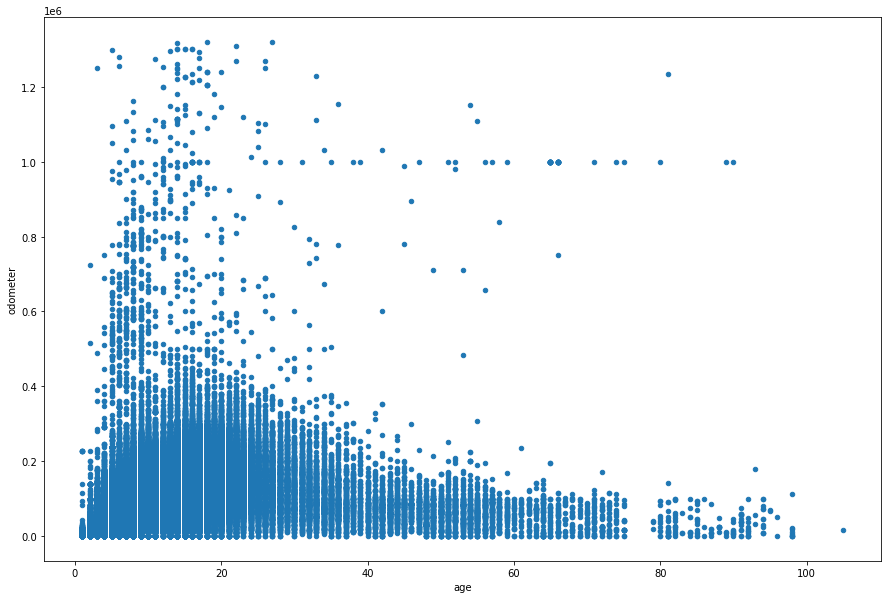

In [192]:
# Verificando que os carros que possuem mais milhas estão entre 17 e 20 anos de uso
df['age'] = 2021 - df['year']
df.plot.scatter(x='age', y='odometer', figsize=(15,10))

In [193]:
# criando a coluna de 'milhas por ano' e a coluna do 'log de milhas por ano' para melhor visualizar os dados
df['miles_per_year'] = df['odometer'] / df['age']
df['log_miles_per_year'] = df['miles_per_year'].apply(np.log10)

In [194]:
df['miles_per_year'].describe()

count    330363.000000
mean      11077.685899
std        6539.010555
min           0.000000
25%        7400.000000
50%       10333.333333
75%       13666.666667
max      416666.666667
Name: miles_per_year, dtype: float64

<AxesSubplot:>

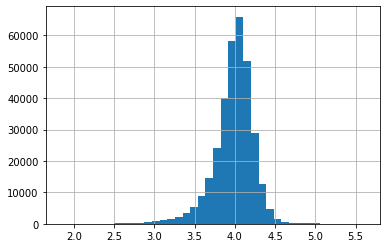

In [195]:
# Mostra que o log_miles_per_year possui uma distribuição simétrica
df[df['log_miles_per_year'] >= 0]['log_miles_per_year'].hist(bins=40)

In [196]:
z_score_df = evaluate_df_z_score_for_column(df, 'log_miles_per_year')
z_score_df

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive,type,paint_color,description,state,lat,long,age,miles_per_year,log_miles_per_year
0,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,3495,2012,jeep,patriot,like new,4 cylinders,gas,132000,...,undefined,undefined,silver,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",az,34.4554,-114.2690,9,14666.666667,4.166331
1,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,13750,2014,bmw,328i m-sport,good,undefined,gas,76237,...,rwd,sedan,grey,Selling my 2014 BMW 328i with the following be...,or,46.1837,-123.8240,7,10891.000000,4.037068
2,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,2300,2001,dodge,caravan,excellent,6 cylinders,gas,199000,...,undefined,undefined,undefined,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",sc,34.9352,-81.9654,20,9950.000000,3.997823
3,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,9000,2004,chevrolet,colorado ls,excellent,5 cylinders,gas,54000,...,rwd,pickup,red,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",az,34.4783,-114.2710,17,3176.470588,3.501945
4,https://maine.craigslist.org/cto/d/gardiner-20...,maine,8500,2005,ford,mustang convertible,excellent,6 cylinders,gas,62800,...,rwd,convertible,silver,2005 Ford Mustang Premium Convertible First ye...,me,44.2070,-69.7858,16,3925.000000,3.593840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329242,https://mohave.craigslist.org/cto/d/hualapai-2...,mohave county,2500,2005,ford,f150,fair,undefined,gas,282866,...,undefined,truck,white,"2005 F150 XLT 5.4 TRITON NEEDS ENGINE, 2WD. A...",az,35.2414,-113.9890,16,17679.125000,4.247461
329243,https://rapidcity.craigslist.org/cto/d/rapid-c...,rapid city / west SD,2700,2002,toyota,camry,good,6 cylinders,gas,194000,...,fwd,undefined,blue,"2002 Toyota Camry. 4-door, navy blue, good ti...",sd,44.0036,-103.3590,19,10210.526316,4.009048
329244,https://oregoncoast.craigslist.org/cto/d/corne...,oregon coast,2450,2001,ford,focus,good,4 cylinders,gas,130484,...,rwd,other,black,"I am selling my ford focus 2001 SE, 130 thousa...",or,45.5272,-123.0950,20,6524.200000,3.814527
329245,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,8995,2013,mazda,mazda3,undefined,undefined,gas,93339,...,fwd,sedan,undefined,Simple Easy Car BuyingNo Games No Gimmicks ...,or,45.5231,-122.5790,8,11667.375000,4.066973


In [197]:
# Calculando a redução do dataset. Redução de cerca de 3%
len(z_score_df) / len(df)

0.9680957007897374

In [198]:
df = z_score_df

In [199]:
# A média aumentou um pouco de valor, se aproximando de 11.200 milhas
df['miles_per_year'].describe()

count    319823.000000
mean      11189.749385
std        5137.518603
min        2403.846154
25%        7666.666667
50%       10487.166667
75%       13757.442308
max       44290.500000
Name: miles_per_year, dtype: float64

<AxesSubplot:xlabel='age', ylabel='odometer'>

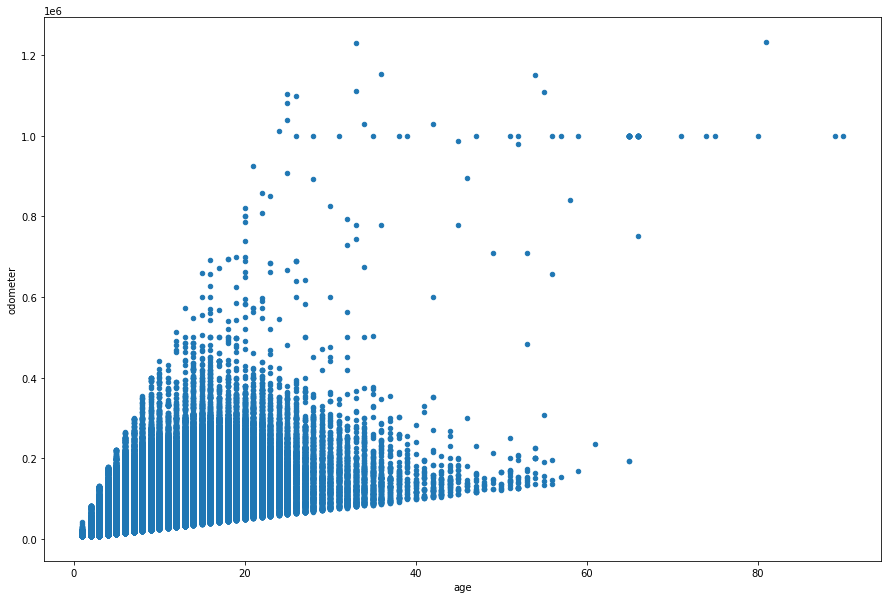

In [200]:
# Em comparação com o plot antes da limpeza, esse faz mais sentido tendo em vista que as milhas de
# carro tendem a aumentar com o passar dos anos de uso.
df.plot.scatter(x='age', y='odometer', figsize=(15,10))

In [201]:
# Remove as colunas geradas para a análise
df = df.drop(columns=['age', 'miles_per_year', 'log_miles_per_year'])
df.head()

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,3495,2012,jeep,patriot,like new,4 cylinders,gas,132000,clean,automatic,undefined,undefined,silver,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",az,34.4554,-114.2690
1,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,13750,2014,bmw,328i m-sport,good,undefined,gas,76237,clean,automatic,rwd,sedan,grey,Selling my 2014 BMW 328i with the following be...,or,46.1837,-123.8240
2,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,2300,2001,dodge,caravan,excellent,6 cylinders,gas,199000,clean,automatic,undefined,undefined,undefined,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",sc,34.9352,-81.9654
3,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,9000,2004,chevrolet,colorado ls,excellent,5 cylinders,gas,54000,clean,automatic,rwd,pickup,red,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",az,34.4783,-114.2710
4,https://maine.craigslist.org/cto/d/gardiner-20...,maine,8500,2005,ford,mustang convertible,excellent,6 cylinders,gas,62800,clean,automatic,rwd,convertible,silver,2005 Ford Mustang Premium Convertible First ye...,me,44.2070,-69.7858


In [202]:
df.to_csv(CLEAN_VEHICLES_2_DATASET, index=False)

### Limpando todas as colunas de uma vez com Ellipitic Envelope(multivariado)

In [251]:
df = load_vehicles_dataset_and_set_types(CLEAN_VEHICLES_2_DATASET)

In [252]:
# Preparação para o usar o Ellipitc Envelope
# Setando os tipos categoricos para codigos
categoric_types = ['type', 'region', 'transmission', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'drive', 'paint_color', 'state']

for column in categoric_types:
    df[column] = df[column].cat.codes

# Removendo colunas do tipo object
df = df.drop(columns=['url', 'description'])

In [253]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(df)

EllipticEnvelope(contamination=0.01)

In [254]:
scores = detector.predict(df)

In [255]:
df['outlier'] = scores
df[df['outlier'] == -1]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,outlier
114,323,59500,2015,40,17925,3,8,2,22076,0,2,3,2,0,9,26.7206,-80.0388,-1
151,323,23990,2015,23,17081,6,8,2,21309,0,2,1,11,10,9,25.7735,-80.3572,-1
159,323,61990,2018,23,15865,6,8,2,9341,0,2,2,9,10,9,25.7735,-80.3572,-1
169,258,10995,2017,34,18157,6,8,2,135584,0,3,1,13,9,37,45.5180,-122.5790,-1
219,258,6688,2005,37,17268,6,8,2,141148,0,3,3,13,4,37,45.5180,-122.5790,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319712,274,14991,2017,25,16243,6,8,2,19875,0,3,3,9,1,37,45.3815,-122.6060,-1
319737,274,10881,2014,20,17672,6,8,2,97014,0,3,0,0,10,37,45.3815,-122.6060,-1
319774,258,7788,2009,16,10321,6,8,2,162583,0,3,1,0,10,37,45.5180,-122.5790,-1
319785,258,12995,2013,37,17268,6,8,2,125204,0,3,3,13,10,37,45.5180,-122.5790,-1


In [256]:
# Redução de cerca de 1% no tamanho do dataset
len(df[df['outlier'] != -1]) / len(df)

0.9899975924183064

In [257]:
# Salvando os indices a serem removidos
idxs_to_remove = df[df['outlier'] == -1].index.values.tolist()
len(idxs_to_remove)

3199

In [258]:
# Carregando novamente o dataset para que se matenha os dados categóricos ao invés dos códigos
df = load_vehicles_dataset_and_set_types(CLEAN_VEHICLES_2_DATASET)

In [260]:
# Removendo os dados detectados como outliers pelo Elliptic Envelope e mantendo os dados categóricos 
# como categorias
df = df.drop(index=idxs_to_remove)
df

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,3495,2012,jeep,patriot,like new,4 cylinders,gas,132000,clean,automatic,undefined,undefined,silver,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",az,34.4554,-114.2690
1,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,13750,2014,bmw,328i m-sport,good,undefined,gas,76237,clean,automatic,rwd,sedan,grey,Selling my 2014 BMW 328i with the following be...,or,46.1837,-123.8240
2,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,2300,2001,dodge,caravan,excellent,6 cylinders,gas,199000,clean,automatic,undefined,undefined,undefined,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",sc,34.9352,-81.9654
3,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,9000,2004,chevrolet,colorado ls,excellent,5 cylinders,gas,54000,clean,automatic,rwd,pickup,red,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",az,34.4783,-114.2710
4,https://maine.craigslist.org/cto/d/gardiner-20...,maine,8500,2005,ford,mustang convertible,excellent,6 cylinders,gas,62800,clean,automatic,rwd,convertible,silver,2005 Ford Mustang Premium Convertible First ye...,me,44.2070,-69.7858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319818,https://mohave.craigslist.org/cto/d/hualapai-2...,mohave county,2500,2005,ford,f150,fair,undefined,gas,282866,clean,automatic,undefined,truck,white,"2005 F150 XLT 5.4 TRITON NEEDS ENGINE, 2WD. A...",az,35.2414,-113.9890
319819,https://rapidcity.craigslist.org/cto/d/rapid-c...,rapid city / west SD,2700,2002,toyota,camry,good,6 cylinders,gas,194000,clean,automatic,fwd,undefined,blue,"2002 Toyota Camry. 4-door, navy blue, good ti...",sd,44.0036,-103.3590
319820,https://oregoncoast.craigslist.org/cto/d/corne...,oregon coast,2450,2001,ford,focus,good,4 cylinders,gas,130484,clean,automatic,rwd,other,black,"I am selling my ford focus 2001 SE, 130 thousa...",or,45.5272,-123.0950
319821,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,8995,2013,mazda,mazda3,undefined,undefined,gas,93339,clean,automatic,fwd,sedan,undefined,Simple Easy Car BuyingNo Games No Gimmicks ...,or,45.5231,-122.5790


In [265]:
df.to_csv(CLEAN_VEHICLES_2_DATASET, index=False)

## Normalização e discretização

In [16]:
df = load_vehicles_dataset_and_set_types(CLEAN_VEHICLES_2_DATASET)
df

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long
0,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,3495,2012,jeep,patriot,like new,4 cylinders,gas,132000,clean,automatic,undefined,undefined,silver,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",az,34.4554,-114.2690
1,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,13750,2014,bmw,328i m-sport,good,undefined,gas,76237,clean,automatic,rwd,sedan,grey,Selling my 2014 BMW 328i with the following be...,or,46.1837,-123.8240
2,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,2300,2001,dodge,caravan,excellent,6 cylinders,gas,199000,clean,automatic,undefined,undefined,undefined,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",sc,34.9352,-81.9654
3,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,9000,2004,chevrolet,colorado ls,excellent,5 cylinders,gas,54000,clean,automatic,rwd,pickup,red,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",az,34.4783,-114.2710
4,https://maine.craigslist.org/cto/d/gardiner-20...,maine,8500,2005,ford,mustang convertible,excellent,6 cylinders,gas,62800,clean,automatic,rwd,convertible,silver,2005 Ford Mustang Premium Convertible First ye...,me,44.2070,-69.7858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316619,https://mohave.craigslist.org/cto/d/hualapai-2...,mohave county,2500,2005,ford,f150,fair,undefined,gas,282866,clean,automatic,undefined,truck,white,"2005 F150 XLT 5.4 TRITON NEEDS ENGINE, 2WD. A...",az,35.2414,-113.9890
316620,https://rapidcity.craigslist.org/cto/d/rapid-c...,rapid city / west SD,2700,2002,toyota,camry,good,6 cylinders,gas,194000,clean,automatic,fwd,undefined,blue,"2002 Toyota Camry. 4-door, navy blue, good ti...",sd,44.0036,-103.3590
316621,https://oregoncoast.craigslist.org/cto/d/corne...,oregon coast,2450,2001,ford,focus,good,4 cylinders,gas,130484,clean,automatic,rwd,other,black,"I am selling my ford focus 2001 SE, 130 thousa...",or,45.5272,-123.0950
316622,https://oregoncoast.craigslist.org/ctd/d/portl...,oregon coast,8995,2013,mazda,mazda3,undefined,undefined,gas,93339,clean,automatic,fwd,sedan,undefined,Simple Easy Car BuyingNo Games No Gimmicks ...,or,45.5231,-122.5790


# Bônus
## Restringindo amostras
Fizemos uma análise dos pontos de latitude e longitude e encontramos que existem registros de fora dos Estados Unidos, como pode ser observado na primeira figura. Para limpar esses dados realizou-se uma pesquisa dos limites de latitude e longitude dos EUA:

TOP_LEFT_PT = (52.920556, -172.437778)
TOP_RIGHT_PT = (71.388889, -156.479167)
BOTTOM_RIGHT_PT = (44.816667, -66.916667)
BOTTOM_LEFT_PT = (18.744167, -155.681111)

Esses pontos estão definidos no arquivo Constants.py. Dessa forma checamos quais amostras estão dentro dos intervalos de latitude e longitude, obtendo o um dataframe livre dos pontos fora dos Estados Unidos.

<AxesSubplot:xlabel='long', ylabel='lat'>

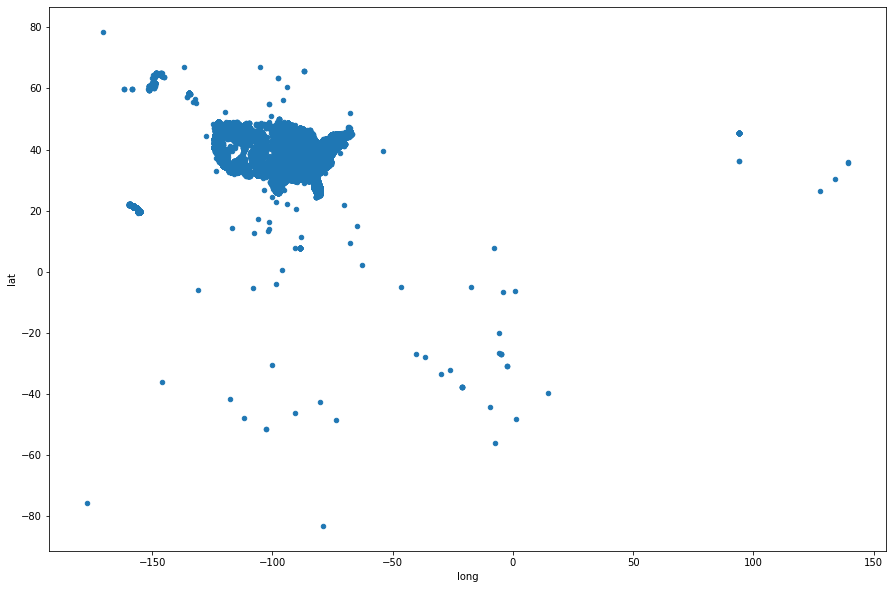

In [3]:
# Dataframe com pontos fora dos EUA, possivelmente outliers, pois o craig list do nosso dataset é apenas
# de anúncios nos EUA.
df.plot.scatter(x='long', y='lat', figsize=(15,10))

<AxesSubplot:xlabel='long', ylabel='lat'>

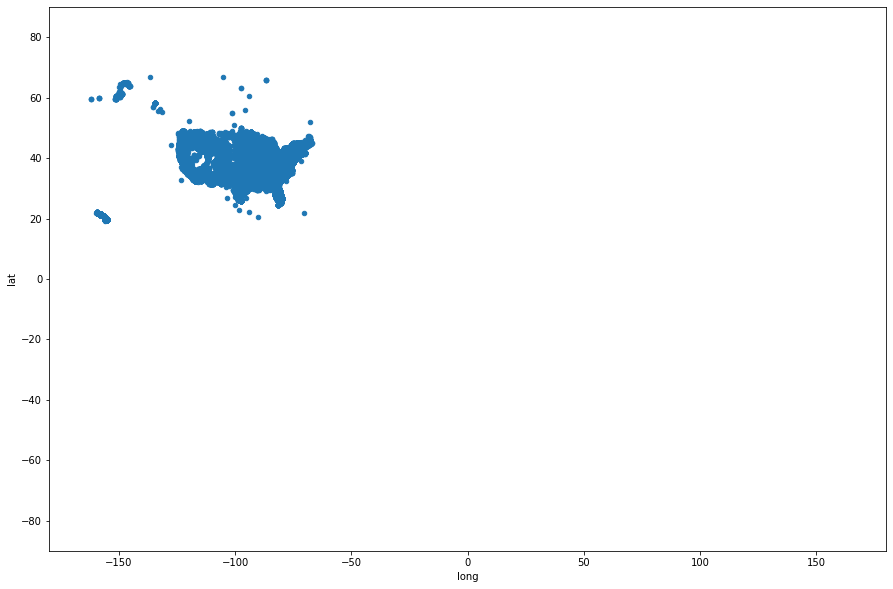

In [12]:
# Dataframe livre de anúncios vindos de fora dos EUA
usa_df = get_samples_in_usa(df)
usa_df.plot.scatter(x='long', y='lat', ylim=[-90,90], xlim=[-180,180], figsize=(15,10))

In [14]:
# Redução de 0,5% no tamanho do dataset
(usa_df) / len(df)

0.9996494264490373

In [ ]:
df = usa_df
df.to_csv(CLEAN_VEHICLES_2_DATASET, index=False)